In [4]:
from google.colab import files
uploaded = files.upload()

Saving quora_duplicate_questions.csv to quora_duplicate_questions.csv


In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("quora_duplicate_questions.csv", index_col=0)
df.shape

(345036, 6)

In [7]:
df.sample(5)


,id,qid1,qid2,question1,question2,is_duplicate
index,,,,,,
270695,317209,622450,622451,When should I start my preparation for the GATE?,How should I prepare for the GATE 2016 startin...,0
262749,307931,604523,604524,What does it mean when someone goes out of his...,If a guy a always goes out his way for me at w...,1
302501,354471,694274,694275,What will happen to my photos in my iPhone if ...,"If I erase my iPhone, will the photos in my ""i...",0
60895,71370,141848,141849,Is there more homework in 9th grade than 8th g...,Do you get more homework in 9th grade than 8th?,1
310692,364032,712609,712610,What shall I do to improve my IQ?,How can you increase your IQ?,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 345036 entries, 0 to 345035
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            345036 non-null  int64 
 1   qid1          345036 non-null  int64 
 2   qid2          345036 non-null  int64 
 3   question1     345035 non-null  object
 4   question2     345034 non-null  object
 5   is_duplicate  345036 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.4+ MB


In [9]:
df.isnull().sum()

,0
id,0
qid1,0
qid2,0
question1,1
question2,2
is_duplicate,0


In [10]:
df.dropna(subset=['question1','question2'], inplace = True)

In [11]:
df.duplicated().sum()

0

is_duplicate
0    208753
1    136280
Name: count, dtype: int64
is_duplicate
0    60.502329
1    39.497671
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

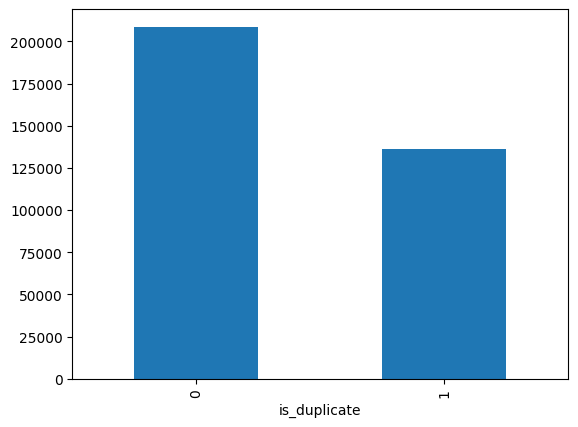

In [12]:
#Distribution of duplicate and non-duplicate questions:
print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts() / df['is_duplicate'].count()) * 100)
df['is_duplicate'].value_counts().plot(kind='bar')

In [13]:
#Repeated Questions:

qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Number of Unique Questions',np.unique(qid).shape[0])
x = qid.value_counts() > 1
print("number of questions getting repeated",x[x].shape[0])

Number of Unique Questions 675521
number of questions getting repeated 10472


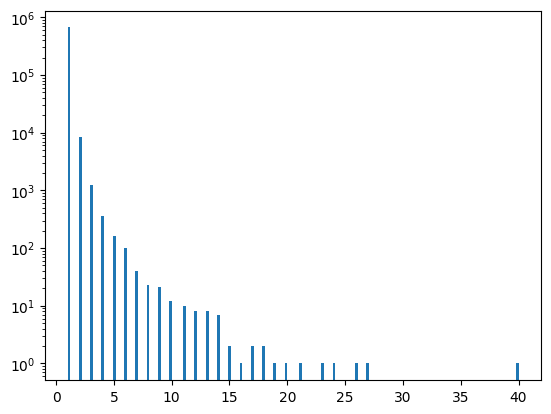

In [14]:
plt.hist(qid.value_counts().values,bins = 160)
plt.yscale('log')
plt.show()

In [17]:
#1.Simple Approach:
ques_df = df[['question1','question2']]
ques_df.sample(5)

,question1,question2
index,,
275214,How do know that you are in love?,How do you know if you are in love with someon...
109772,What are the best male masturbation techniques?,I have been masturbating 2 times or more than ...
69459,What is the difference between the NBFC-D and ...,What is the difference between NetBanking and ...
21912,What are some differences between KVA and KVAR?,Electricity: What is the difference between KV...
279801,Cybersecurity must be open and replaceable?,What are advantages of machine learning for cs...


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
#merge texts:
#Bag Of Words:
questions = list(ques_df['question1']) + list(ques_df['question2'])
cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)